In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npf
import os
%matplotlib inline

# Application Train/Test dataset

In [2]:
file_app_train = './data/application_train.csv'

In [3]:
app_train_data = pd.read_csv(file_app_train)

In [4]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(app_train_data.head(10))

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2     

In [5]:
app_train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

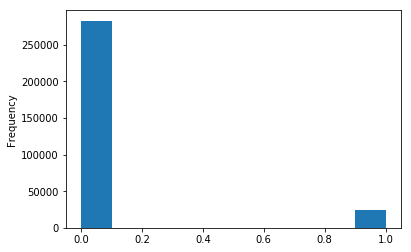

In [6]:
app_train_data['TARGET'].astype(int).plot.hist()

In [7]:
app_train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
app_train_data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Name Contract Type

In [9]:
subdata = app_train_data['Name_Contract_Type'.upper()]
subdata.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [10]:
print('Number of missing value: {}'.format(subdata.isnull().sum()))

Number of missing value: 0


Since there are two types, we can use a lable rather than one hot to represent this field.

## Own Car

In [11]:
subdata = app_train_data['FLAG_OWN_CAR']
subdata.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [12]:
print('Number of missing values: {}'.format(subdata.isnull().sum()))

Number of missing values: 0


## Gender

In [13]:
subdata = app_train_data['CODE_GENDER']
subdata.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [14]:
print('Number of missing values: {}'.format(subdata.isnull().sum()))

Number of missing values: 0


In [15]:
subdata = app_train_data[app_train_data['CODE_GENDER']=='XNA']
subdata.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY             ...              FLAG_DOCUMENT_18  \
35657       19125.0             ...                             0   
38566       13500.0             ...                             0   
83382       20250.0             ...                             0   
189640      27000.0             ...                             0   

       FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
35657                 0                0                0   
38566                 0                0                0   
83382                 0                0                0   
189640                0                0                0   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
35657                         0.0                       0.0   
38566                         0.0                       0.0   
83382                         0.0                       0.0   
189640                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
35657                          0.0                        0.0   
38566                          0.0                        3.0   
83382                          0.0                        0.0   
189640                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
35657                         0.0                         1.0  
38566                         0.0                         4.0  
83382                         0.0                         3.0  
189640                        1.0                         6.0  

[4 rows x 122 columns]

## Own Realty

In [16]:
subdata = app_train_data['FLAG_OWN_REALTY']
subdata.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [17]:
print('Number of missing values: {}'.format(subdata.isnull().sum()))

Number of missing values: 0


# Apply the above procedure to all columns

In [18]:
cols = app_train_data.columns.values
app_train_data_summary = pd.DataFrame(columns=['dtype', 'unique num', 'null %']
                                      , index=app_train_data.columns.values)
N = app_train_data.shape[0]

In [19]:
for col in cols:
    app_train_data_summary.loc[col, 'dtype'] = app_train_data[col].dtype
    app_train_data_summary.loc[col, 'unique num'] = app_train_data[col].unique().size
    app_train_data_summary.loc[col,'null %'] = app_train_data[col].isnull().sum()/N*100

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(app_train_data_summary)
    
app_train_data_summary.to_csv('app_train_data_summary.csv')

                                dtype unique num       null %
SK_ID_CURR                      int64     307511            0
TARGET                          int64          2            0
NAME_CONTRACT_TYPE             object          2            0
CODE_GENDER                    object          3            0
FLAG_OWN_CAR                   object          2            0
FLAG_OWN_REALTY                object          2            0
CNT_CHILDREN                    int64         15            0
AMT_INCOME_TOTAL              float64       2548            0
AMT_CREDIT                    float64       5603            0
AMT_ANNUITY                   float64      13673    0.0039023
AMT_GOODS_PRICE               float64       1003    0.0904033
NAME_TYPE_SUITE                object          8     0.420148
NAME_INCOME_TYPE               object          8            0
NAME_EDUCATION_TYPE            object          5            0
NAME_FAMILY_STATUS             object          6            0
NAME_HOU

# Observation
- Need to convert 'object' dtype into numeric labels or one-hot vectors
- CODE_GENDER encodes a gender of the loaner. The majorities are F and M, but there are 4 instances of XNA. We have to convert these XNAs to either F or M. I choose F.
- NAME_FAMILY_STATUS has 'Unknown' entries. I will convert to 'Single / not married'.

In [21]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(app_train_data.head(10))

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2     

In [35]:
col = 'OCCUPATION_TYPE'
app_train_data[col].unique()
# cdata = app_train_data.copy(deep=True)
# meanval = cdata.loc[cdata[col]<300000, col].mean()
# cdata.loc[cdata[col]>300000, col] = meanval

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [37]:
cdata = app_train_data.copy(deep=True)
cdata.loc[ cdata[col].isnull(), col] = 'Unknown'

In [38]:
cdata[col].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Unknown',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [23]:
# import matplotlib.pyplot as plt
# plt.hist(app_train_data.loc[app_train_data[col]<300000,col])

In [33]:
# subdata = app_train_data[app_train_data[col].isnull()]

# with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
#     print(subdata.head(10))

    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8       100011       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
28      100033       0         Cash loans           M            Y   
30      100035       0         Cash loans           F            N   
38      100045       0         Cash loans           F            N   
43      100050       0         Cash loans           F            N   
44      100051       0         Cash loans           M            N   
46      100053       0         Cash loans           F            N   
52      100060       0         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
8                Y             0        112500.000   1019610.0      33826.5   
11               Y             0         38419.155    148365.0      106